# Zadanie 4

## Warunkowa wartość oczekiwana

Wartość oczekiwana f(X) zmiennej Y warunkowanej zmienną X ma bardzo ciekawą interpretację, mianowicie spełnia
własność

$$
E(Y/X=x)=f(x)=arg minE((Y-g(X))^2)
$$

Oznacza to, że E (Y |X) to najlepsze przybliżenie w sensie $L^2$ zmiennej Y korzystające z danych pochodzących ze zmiennej X.

Zaczniemy od zaimportowania najważniejszych bibliotek.

In [3]:
import typing

import matplotlib.pyplot as plt
import numpy as np

Ustawmy także parametry potrzebne do naszych symulacji:


In [9]:
lambd = 10  # Parametr intensywności
T = 1  # Czas trwania procesu Poissona
n = 1000  # Ilość generowanych próbek
s = 1  # Czas w chwili s
t_max = 5  # Czas maksymalny

## I

W pierwszej części sprawdzimy, że jeśli X, Y są zmiennymi niezależnymi a E (Y ) = 0, to dla Z = XY + sin X zachodzi E (Z|X) = sin X. Podane stwierdzenie sprawdzimy dla X, Y iid. z rozkładu normalnego.

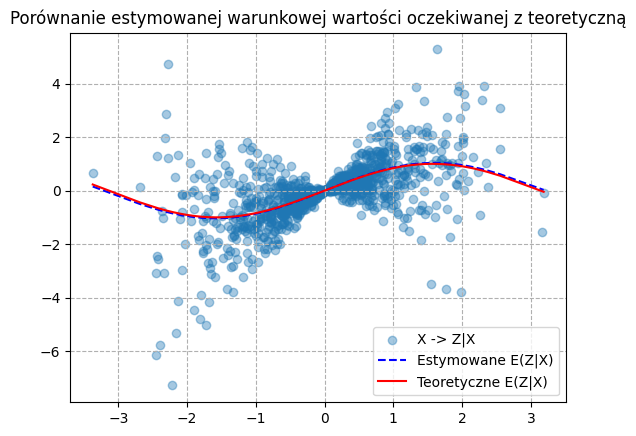

In [13]:
# Generujemy obie zmienne losowe n-krotnie
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
X = sorted(X)  # Sortujemy, dla łatwiejszej wizualizacji na wykresie
Z = X * Y + np.sin(X)  # Obliczamy zmienną losową Z


def estymowaneE(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    """
    Funckja estymuje zmienną losową Z za pomocą średniej

    Parametry:
    X (np.ndarray): tablica zmiennych losowych z rozkładu normalnego
    Y (np.ndarray): tablica zmiennych losowych z rozkładu normalnego

    Zwraca:
    srednia (np.ndarray): srednia po x z X dla Z

    """
    srednia = np.zeros(len(X))
    for i, x in enumerate(X):
        srednia[i] = np.mean(x * Y + np.sin(x))
    return srednia


srednia = estymowaneE(X, Y)

plt.scatter(X, Z, alpha=0.4, label="X -> Z|X")
plt.plot(X, srednia, linestyle="--", color="blue", label="Estymowane E(Z|X)")
plt.plot(X, np.sin(X), color="red", label="Teoretyczne E(Z|X)")
plt.grid(linestyle="--")
plt.title("Porównanie estymowanej warunkowej wartości oczekiwanej z teoretyczną")
plt.legend(loc="best")
plt.show()

# II

Gdy N jest procesem Poissona o intensywnosci λ, to dla T ≥ t ≥ 0 zachodzi E (Nt|NT ) = tNT /T. Oznacza
to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w chwili T (czyli NT ), to najlepszym przybliżeniem dotychczasowej chwili
klientów w chwili t < T równej Nt jest tNT /T. Podane stwierdzenie sprawdzimy dla T = 1, λ = 10.

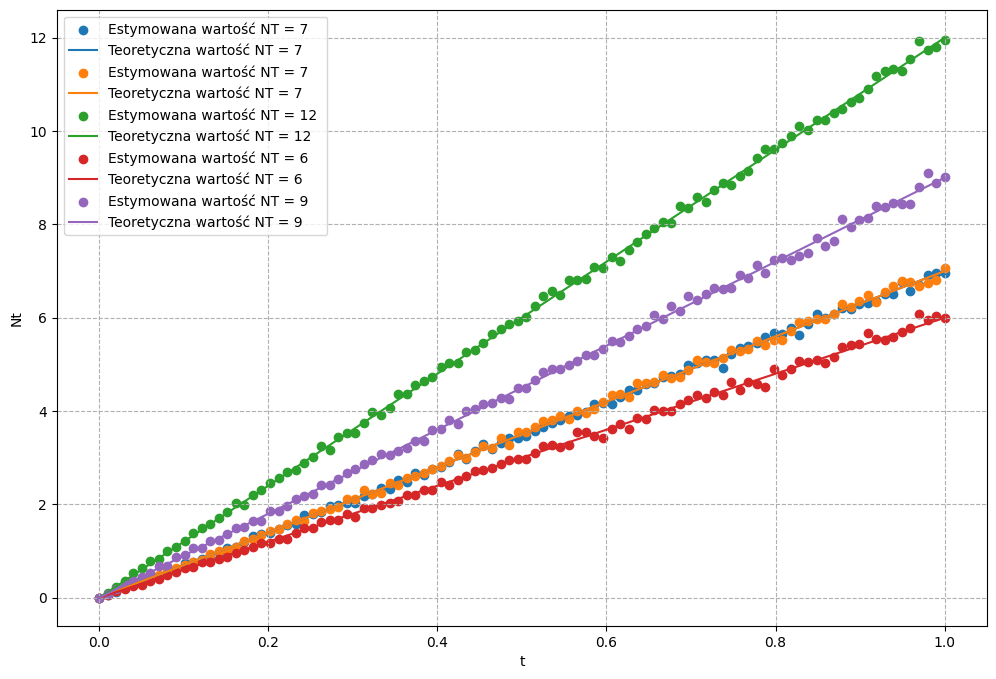

In [8]:
def poiss(lambd: float = 10, T: float = 1) -> typing.List[float]:
    """
    Funckja generująca proces Poissona

    Parametry:
    lambda (float): parametr intensywności
    T (float): czas trwania programu

    Zwraca:
    S (list): momenty skoków

    """
    S = []
    t = 0
    while (t := t - 1 / lambd * np.log(np.random.uniform())) <= T:
        S.append(t)
    return S


def teor_poiss(t: float, NT: int, T: float) -> float:
    """
    Funckja tworzy teoretyczną warunkową wartość oczekiwaną

    Parametry:
    t (float): czas w danej chwili t
    T (float): maksymalny czas

    Zwraca:
    (float): prognozowana wartość procesu Poissona w chwili t

    """
    return t * NT / T


def est_poiss(t: float, NT: int) -> float:
    """
    Funckja estymuje warunkową wartość oczekiwaną za pomocą średniej

    Parametry:
    t (float): czas w danej chwili t
    NT (float): znana wartość procesu Poissona

    Zwraca:
    (float): prognozowana wartość procesu Poissona w chwili t

    """
    nt = np.zeros(len(t))
    n = 1000
    for i, t_i in enumerate(t):
        srednia = np.zeros(n)
        for j in range(n):
            srednia[j] = len(poiss(NT, t_i))
        nt[i] = np.mean(srednia)
    return nt


T = 1
t = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 8))
for i in range(5):  # Tworzenie 5 trajektorii
    NT = len(poiss(10, T))
    plt.scatter(t, est_poiss(t, NT), label=f"Estymowana wartość NT = {NT} ")
    plt.plot(t, teor_poiss(t, NT, T), label=f"Teoretyczna wartość NT = {NT} ")


plt.ylabel("Nt")
plt.xlabel("t")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

## III

Gdy N jest procesem Poissona o intensywnosci λ, to dla t ≥ s ≥ 0 zachodzi E (Nt|Fs) = Ns + λ(t − s), gdzie
Fs to filtracja naturalna procesu Ns. Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z
procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w każdej chwili ω spełniającej
0 ≤ ω ≤ s (czyli Fs), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili t ≥ s jest Ns+λ(t−s).

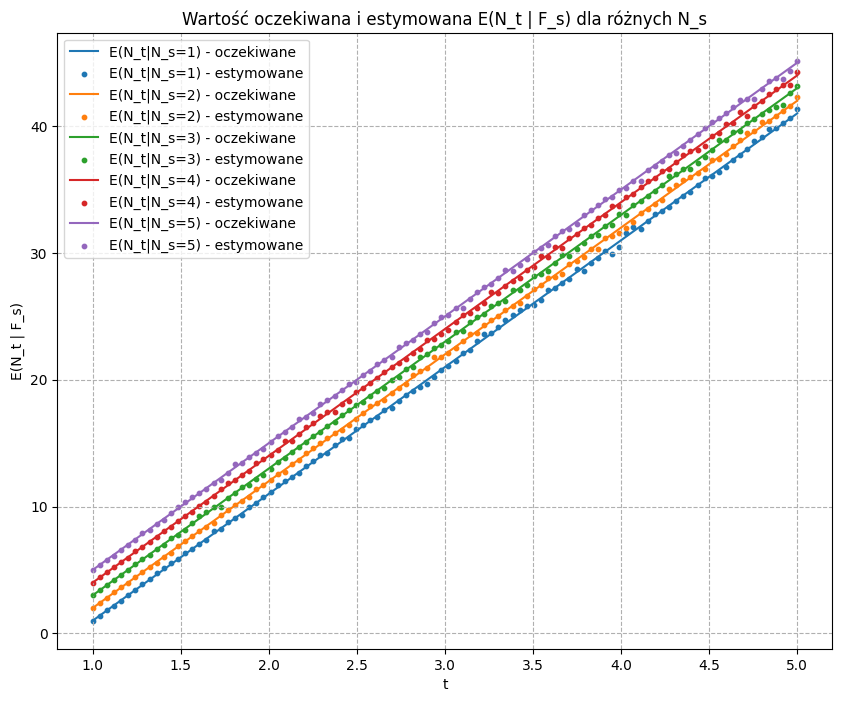

In [14]:
# Generowanie trajektorii do czasu s
trajektorie = [poiss(lambd, s) for _ in range(n)]
Ns_values = [len(traj) for traj in trajektorie]

# Wybór kilku różnych wartości Ns
unique_Ns = sorted(set(Ns_values))[:5]  # Wybieramy 5 unikalnych wartości Ns
selected_trajectories = [traj for traj in trajektorie if len(traj) in unique_Ns]

# Symulacja dla t > s i estymacja E(Nt|Fs)
t_values = np.linspace(s, t_max, 100)
plt.figure(figsize=(10, 8))

for Ns in unique_Ns:
    future_counts = []

    # Generowanie przyszłych wartości dla każdego t > s
    for _ in range(n):
        additional_events = np.random.poisson(lambd * (t_values - s))
        future_counts.append(Ns + additional_events)

    future_counts = np.array(future_counts)
    Nt_estimates = np.mean(future_counts, axis=0)
    expected_values = Ns + lambd * (t_values - s)

    plt.plot(t_values, expected_values, label=f"E(N_t|N_s={Ns}) - oczekiwane")
    plt.scatter(t_values, Nt_estimates, s=10, label=f"E(N_t|N_s={Ns}) - estymowane")

# Wykres
plt.xlabel("t")
plt.ylabel("E(N_t | F_s)")
plt.title("Wartość oczekiwana i estymowana E(N_t | F_s) dla różnych N_s")
plt.legend()
plt.grid(linestyle="--")
plt.show()